# Librairie 📚

In [1]:
# Data manipulation

import pandas as pd
import numpy as np
from scipy import stats

# Data visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import plotly.express as px

# Machine learning - Hold out method

from sklearn.model_selection import train_test_split

# Import des données 📥

In [2]:
df_colleges  = pd.read_csv("/content/GE_colleges_all.csv")

In [3]:
df_lycees = pd.read_csv("/content/GE_lycees_all.csv")

# 1 - Nettoyage et préparation des données 🧹

## GE college all - df_colleges

### Conversion des types de données

In [4]:
df_colleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   uai                                 767 non-null    object 
 1   rentree_scolaire                    767 non-null    object 
 2   academie                            767 non-null    object 
 3   departement                         767 non-null    object 
 4   commune                             767 non-null    object 
 5   denomination_principale             767 non-null    object 
 6   secteur                             767 non-null    object 
 7   nb_eleves                           767 non-null    int64  
 8   rep                                 767 non-null    int64  
 9   rep_plus                            767 non-null    int64  
 10  ips                                 767 non-null    float64
 11  nb_candidats_g                      767 non-n

### Gestion des valeurs nulles ❌

In [5]:
df_colleges.isna().mean().sort_values(ascending=False).head(4)

,0
va_de_la_note_g,0.044329
va_du_taux_de_reussite_g,0.044329
taux_dacces_6eme_3eme,0.001304
academie,0.000000


In [6]:
## Creation d'un df_colleges_imputed en cas de besoin
from sklearn.impute import SimpleImputer

columns = ['va_de_la_note_g','va_du_taux_de_reussite_g','taux_dacces_6eme_3eme']

imputer = SimpleImputer(strategy='median').set_output(transform="pandas")

df_colleges_imputed = df_colleges

df_colleges_imputed[columns] = imputer.fit_transform(df_colleges[columns])

### Suppression des doublons

In [7]:
df_colleges_imputed.duplicated().value_counts(normalize=True)

,proportion
False,1.0


In [8]:
df_colleges_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   uai                                 767 non-null    object 
 1   rentree_scolaire                    767 non-null    object 
 2   academie                            767 non-null    object 
 3   departement                         767 non-null    object 
 4   commune                             767 non-null    object 
 5   denomination_principale             767 non-null    object 
 6   secteur                             767 non-null    object 
 7   nb_eleves                           767 non-null    int64  
 8   rep                                 767 non-null    int64  
 9   rep_plus                            767 non-null    int64  
 10  ips                                 767 non-null    float64
 11  nb_candidats_g                      767 non-n

### Gérer les outliers

In [9]:
df_colleges_imputed.columns

Index(['uai', 'rentree_scolaire', 'academie', 'departement', 'commune',
       'denomination_principale', 'secteur', 'nb_eleves', 'rep', 'rep_plus',
       'ips', 'nb_candidats_g', 'taux_de_reussite_g',
       'va_du_taux_de_reussite_g', 'note_a_lecrit_g', 'va_de_la_note_g',
       'taux_dacces_6eme_3eme', 'part_presents_3eme_ordinaire_total',
       'part_mention_ab_g', 'part_mention_b_g', 'part_mention_tb_g',
       'part_mention_global_g'],
      dtype='object')

In [10]:
numeric_col = ['nb_eleves', 'rep', 'rep_plus',
       'ips', 'nb_candidats_g', 'taux_de_reussite_g',
       'va_du_taux_de_reussite_g', 'note_a_lecrit_g', 'va_de_la_note_g',
       'taux_dacces_6eme_3eme', 'part_presents_3eme_ordinaire_total',
       'part_mention_ab_g', 'part_mention_b_g', 'part_mention_tb_g',
       'part_mention_global_g']

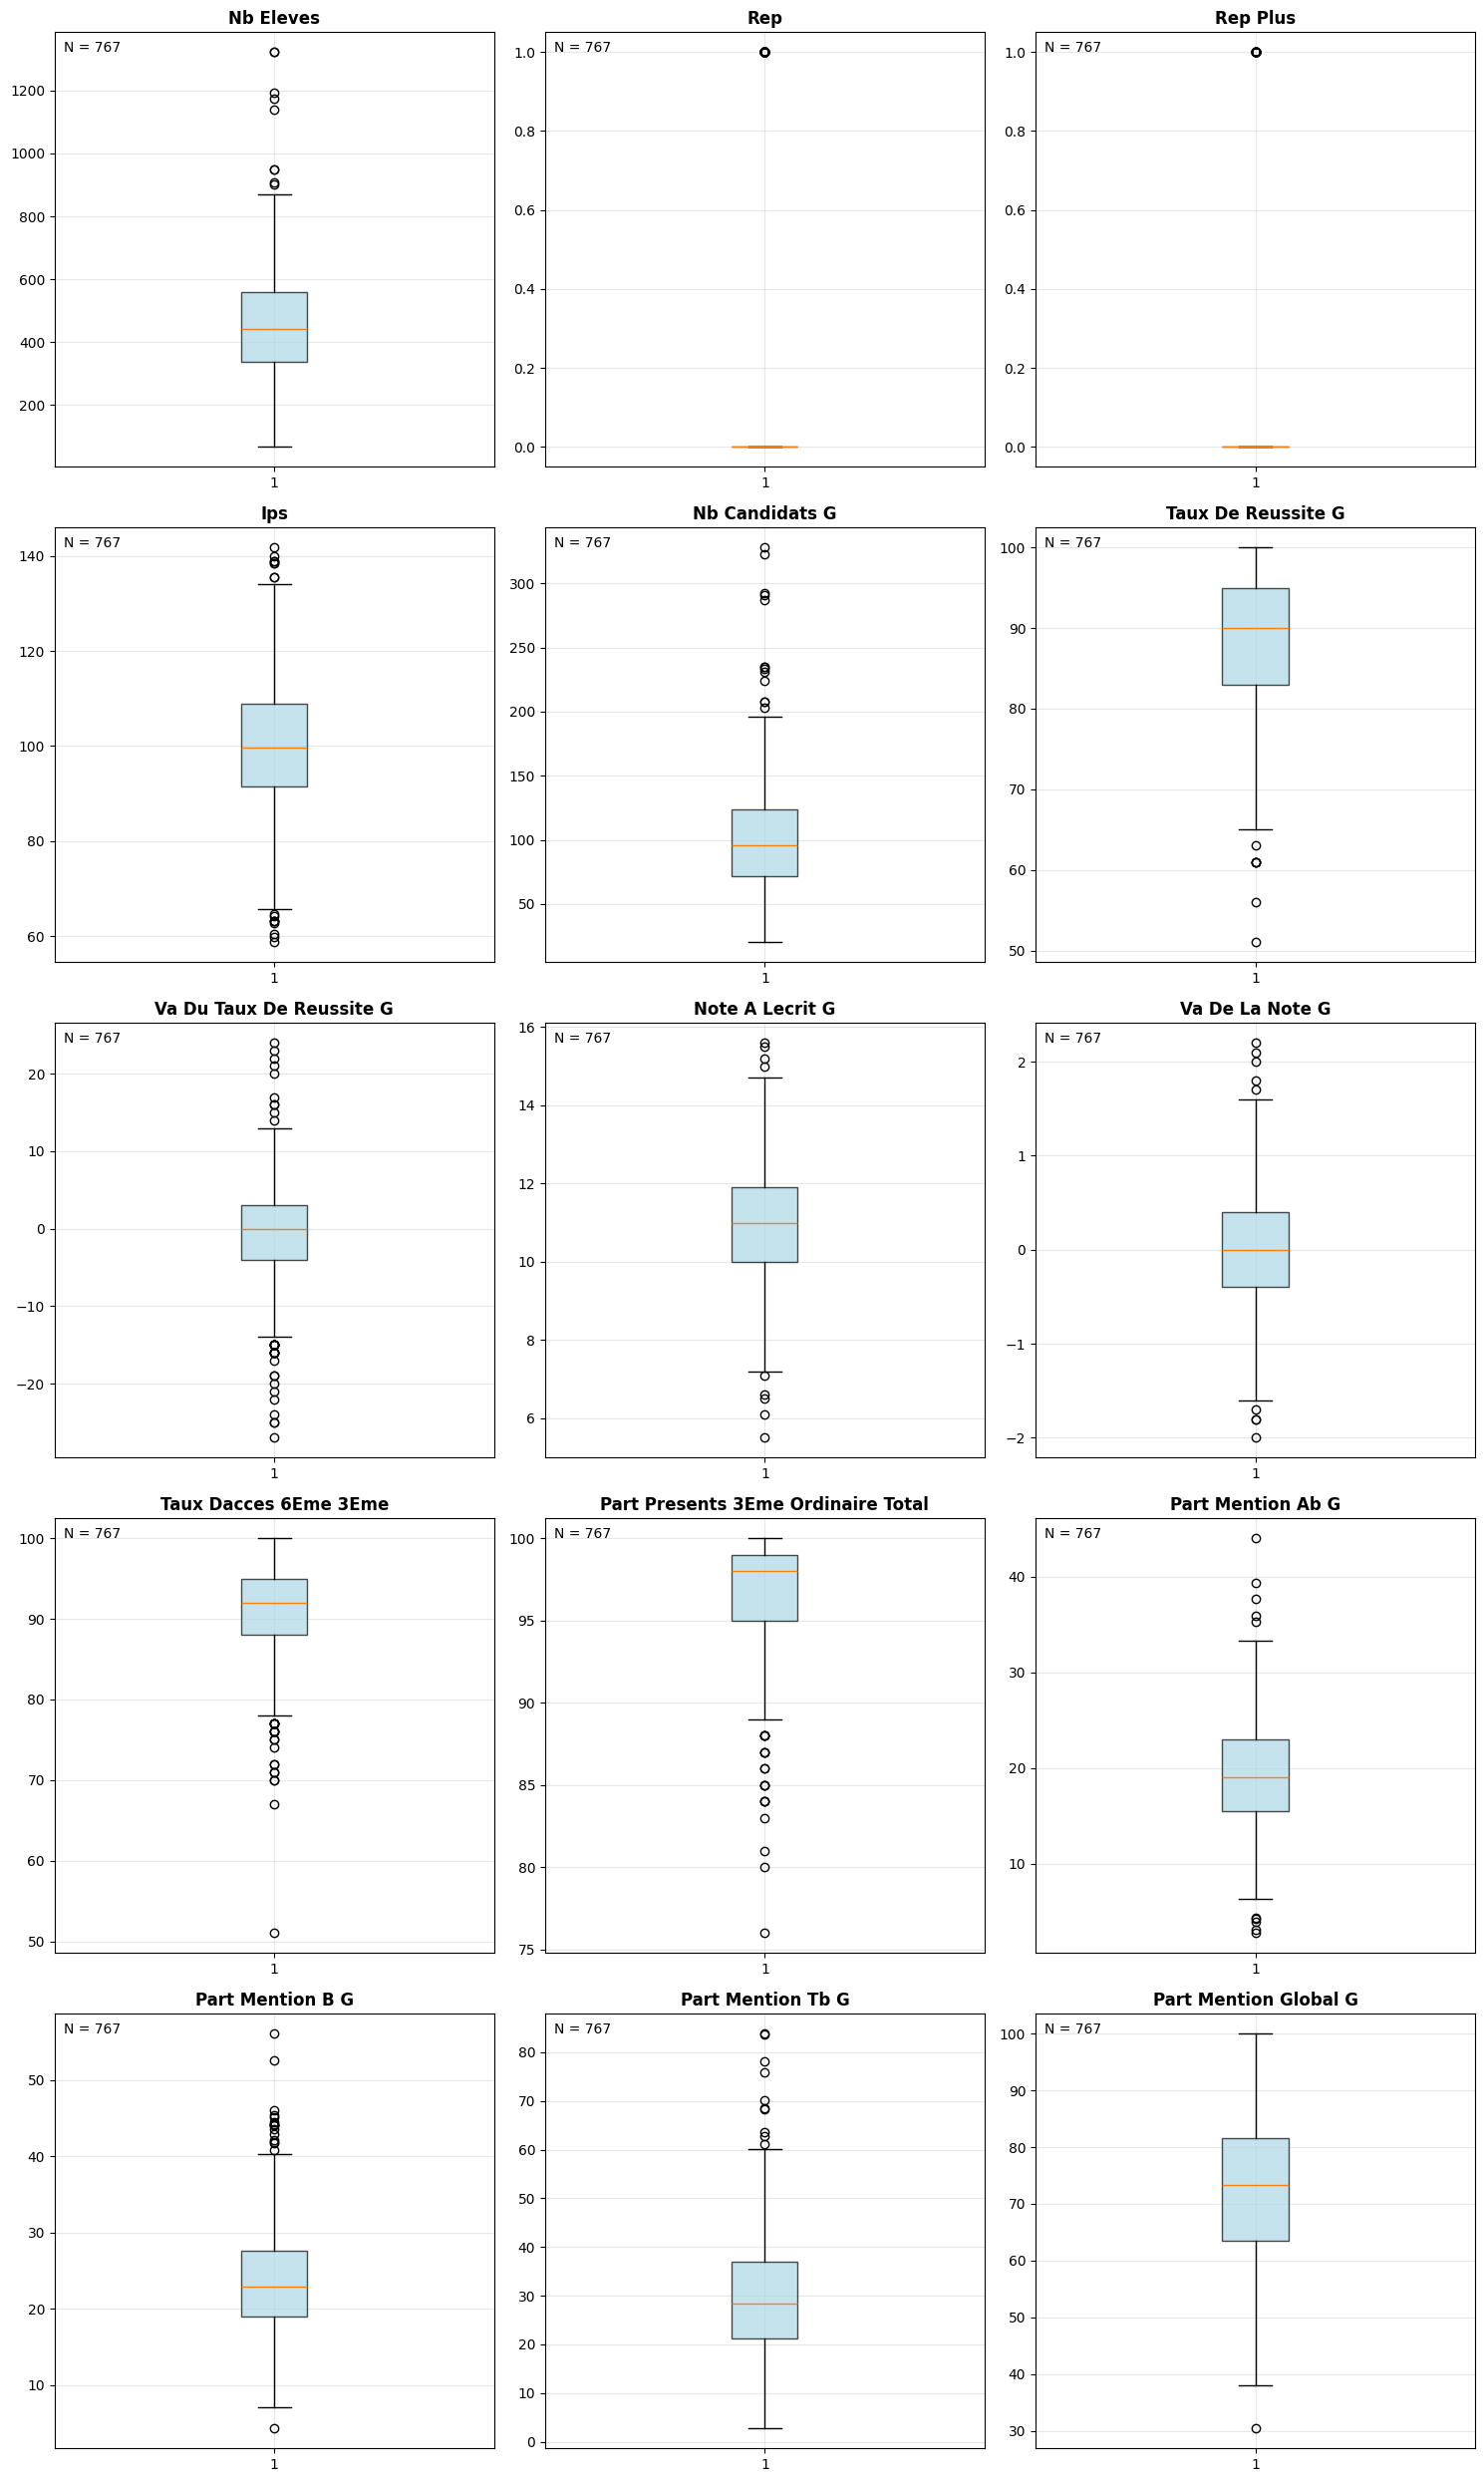

In [11]:
# Calculer le nombre de lignes et colonnes
n_cols = len(numeric_col)
n_rows = (n_cols + 2) // 3  # 3 graphiques par ligne

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numeric_col):
    if i < len(axes):
        # Boxplot avec détection des outliers
        bp = axes[i].boxplot(df_colleges_imputed[col].dropna(),
                            patch_artist=True,
                            boxprops=dict(facecolor='lightblue', alpha=0.7))

        axes[i].set_title(f"{col.replace('_', ' ').title()}", fontweight='bold')
        axes[i].grid(True, alpha=0.3)

        # Ajouter le nombre d'observations
        n_obs = df_colleges_imputed[col].notna().sum()
        axes[i].text(0.02, 0.98, f'N = {n_obs}',
                    transform=axes[i].transAxes, verticalalignment='top')

# Masquer les axes inutilisés
for i in range(len(numeric_col), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
# Calculer le Z-scores :
df_numeric = df_colleges_imputed[numeric_col]

for col in numeric_col:
  z_scores = np.abs(stats.zscore(df_numeric[col]))
  outliers = df_colleges_imputed[z_scores > 3]
  nb_outliers = len(outliers)
  nb_total = len(df_colleges_imputed)
  pourcentage = (nb_outliers / nb_total) * 100

  print(col)
  print('='*18)
  print(f"Nombre d'outliers : {nb_outliers}")
  print(f"Nombre total d'observations : {nb_total}")
  print(f"Pourcentage d'outliers : {pourcentage:.2f}%")
  print("")

nb_eleves
Nombre d'outliers : 5
Nombre total d'observations : 767
Pourcentage d'outliers : 0.65%

rep
Nombre d'outliers : 73
Nombre total d'observations : 767
Pourcentage d'outliers : 9.52%

rep_plus
Nombre d'outliers : 43
Nombre total d'observations : 767
Pourcentage d'outliers : 5.61%

ips
Nombre d'outliers : 0
Nombre total d'observations : 767
Pourcentage d'outliers : 0.00%

nb_candidats_g
Nombre d'outliers : 10
Nombre total d'observations : 767
Pourcentage d'outliers : 1.30%

taux_de_reussite_g
Nombre d'outliers : 6
Nombre total d'observations : 767
Pourcentage d'outliers : 0.78%

va_du_taux_de_reussite_g
Nombre d'outliers : 11
Nombre total d'observations : 767
Pourcentage d'outliers : 1.43%

note_a_lecrit_g
Nombre d'outliers : 5
Nombre total d'observations : 767
Pourcentage d'outliers : 0.65%

va_de_la_note_g
Nombre d'outliers : 3
Nombre total d'observations : 767
Pourcentage d'outliers : 0.39%

taux_dacces_6eme_3eme
Nombre d'outliers : 9
Nombre total d'observations : 767
Pourcent

## GE lycees all - df_lycees

### Gestion des valeurs nulles

In [13]:
df_lycees.isna().mean().sort_values(ascending=False)

,0
part_mention_tb_sf,0.780928
part_mention_tb_af,0.780928
part_mention_b,0.662371
part_mention_ab,0.649485
ips_voie_pro,0.634021
commune,0.000000
secteur,0.000000
denomination_principale,0.000000
departement,0.000000
uai,0.000000


In [14]:
cols_to_drop = [col for col in df_lycees.columns if df_lycees[col].isna().mean() > 0.3]

df_lycees_clean = df_lycees.drop(columns=cols_to_drop)

### Suppresion des doublons

In [15]:
df_lycees_clean.duplicated().value_counts(normalize=True)

,proportion
False,1.0


### Gestion des outliers

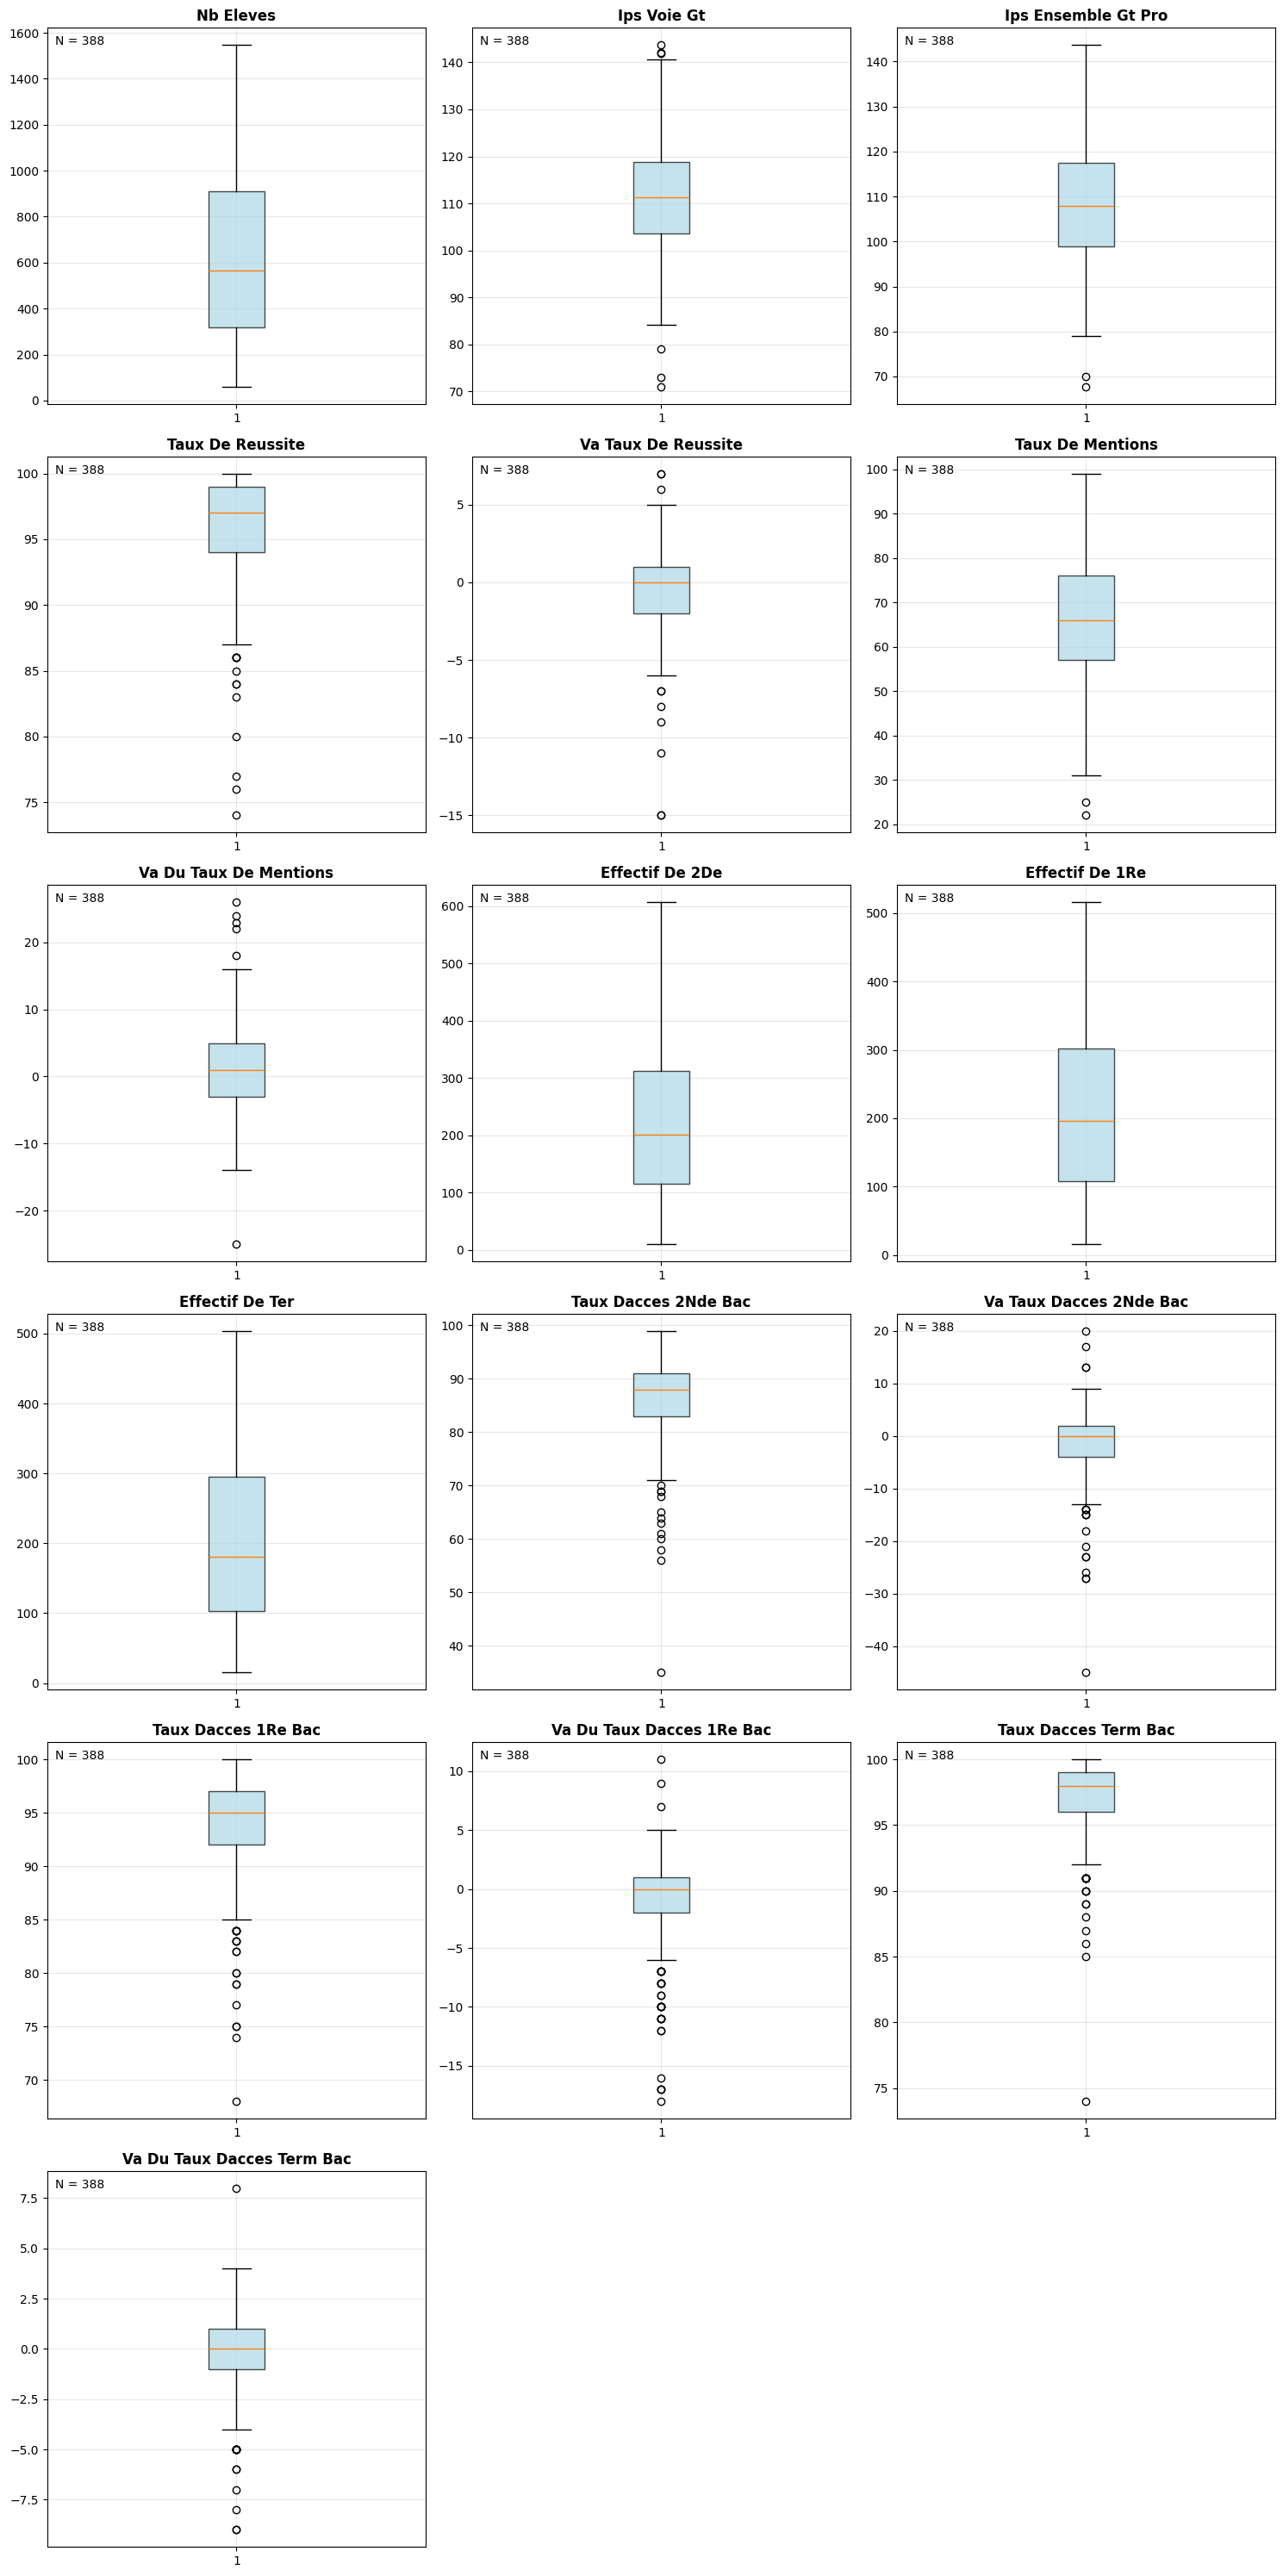

In [16]:
# Calculer le nombre de lignes et colonnes
numeric_col = df_lycees_clean.select_dtypes(include='number').columns

n_cols = len(numeric_col)
n_rows = (n_cols + 2) // 3  # 3 graphiques par ligne

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numeric_col):
    if i < len(axes):
        # Boxplot avec détection des outliers
        bp = axes[i].boxplot(df_lycees_clean[col].dropna(),
                            patch_artist=True,
                            boxprops=dict(facecolor='lightblue', alpha=0.7))

        axes[i].set_title(f"{col.replace('_', ' ').title()}", fontweight='bold')
        axes[i].grid(True, alpha=0.3)

        # Ajouter le nombre d'observations
        n_obs = df_lycees_clean[col].notna().sum()
        axes[i].text(0.02, 0.98, f'N = {n_obs}',
                    transform=axes[i].transAxes, verticalalignment='top')

# Masquer les axes inutilisés
for i in range(len(numeric_col), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

📋 Colonnes numériques détectées : ['nb_eleves', 'ips_voie_gt', 'ips_ensemble_gt_pro', 'taux_de_reussite', 'va_taux_de_reussite', 'taux_de_mentions', 'va_du_taux_de_mentions', 'effectif_de_2de', 'effectif_de_1re', 'effectif_de_ter', 'taux_dacces_2nde_bac', 'va_taux_dacces_2nde_bac', 'taux_dacces_1re_bac', 'va_du_taux_dacces_1re_bac', 'taux_dacces_term_bac', 'va_du_taux_dacces_term_bac']
🔍 DÉTECTION D'OUTLIERS AVEC Z-SCORES
📊 NB_ELEVES
-------------
   Outliers détectés    :      0
   Observations valides :    388
   Total observations   :    388
   Pourcentage outliers :   0.00%

📊 IPS_VOIE_GT
---------------
   Outliers détectés    :      2
   Observations valides :    388
   Total observations   :    388
   Pourcentage outliers :   0.52%
   Exemples de valeurs  : [73.0, 71.0]

📊 IPS_ENSEMBLE_GT_PRO
-----------------------
   Outliers détectés    :      1
   Observations valides :    388
   Total observations   :    388
   Pourcentage outliers :   0.26%
   Exemples de valeurs  : [67.7]

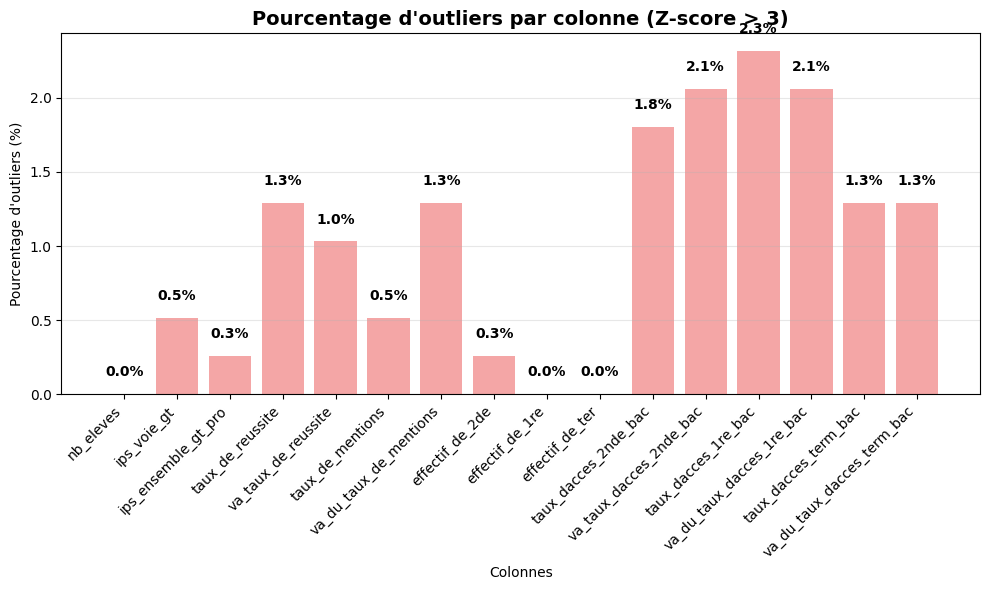

In [17]:
# Version améliorée pour la détection d'outliers avec Z-scores
import pandas as pd
import numpy as np
from scipy import stats

def detect_outliers_zscore(df, numeric_columns, threshold=3):
    """
    Détecte les outliers dans un DataFrame en utilisant les Z-scores

    Args:
        df: DataFrame pandas
        numeric_columns: liste des colonnes numériques à analyser
        threshold: seuil du Z-score (défaut: 3)

    Returns:
        dict: dictionnaire avec les résultats pour chaque colonne
    """
    # Vérifier la présence de valeurs manquantes
    df_numeric = df[numeric_columns].copy()

    # Gérer les valeurs manquantes si nécessaire
    if df_numeric.isnull().sum().sum() > 0:
        print("⚠️  Valeurs manquantes détectées - elles seront ignorées dans le calcul des Z-scores")

    results = {}

    print("🔍 DÉTECTION D'OUTLIERS AVEC Z-SCORES")
    print("=" * 50)

    for col in numeric_columns:
        # Calculer les Z-scores (en ignorant les NaN)
        z_scores = np.abs(stats.zscore(df_numeric[col], nan_policy='omit'))

        # Identifier les outliers
        outliers_mask = z_scores > threshold
        outliers_indices = df.index[outliers_mask]

        # Statistiques
        nb_outliers = len(outliers_indices)
        nb_valid = df_numeric[col].notna().sum()  # Nombre de valeurs non-NaN
        nb_total = len(df)
        pourcentage = (nb_outliers / nb_valid) * 100 if nb_valid > 0 else 0

        # Stocker les résultats
        results[col] = {
            'nb_outliers': nb_outliers,
            'nb_valid': nb_valid,
            'nb_total': nb_total,
            'pourcentage': pourcentage,
            'outliers_indices': outliers_indices.tolist(),
            'outliers_values': df.loc[outliers_indices, col].tolist() if nb_outliers > 0 else []
        }

        # Affichage amélioré
        print(f"📊 {col.upper()}")
        print("-" * (len(col) + 4))
        print(f"   Outliers détectés    : {nb_outliers:>6}")
        print(f"   Observations valides : {nb_valid:>6}")
        print(f"   Total observations   : {nb_total:>6}")
        print(f"   Pourcentage outliers : {pourcentage:>6.2f}%")

        # Afficher quelques valeurs d'outliers si présents
        if nb_outliers > 0:
            sample_values = results[col]['outliers_values'][:5]  # Afficher max 5 valeurs
            print(f"   Exemples de valeurs  : {sample_values}")
            if nb_outliers > 5:
                print(f"   ... et {nb_outliers - 5} autres")

        print()

    return results

# Utilisation du code amélioré
# ÉTAPE 1: Identifier automatiquement les colonnes numériques
numeric_col = df_lycees_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"📋 Colonnes numériques détectées : {numeric_col}")

# OU spécifier manuellement tes colonnes (remplace par les vraies noms)
# numeric_col = ['ta_colonne1', 'ta_colonne2', 'ta_colonne3']

# ÉTAPE 2: Vérifier que les colonnes existent
colonnes_existantes = [col for col in numeric_col if col in df_lycees_clean.columns]
colonnes_manquantes = [col for col in numeric_col if col not in df_lycees_clean.columns]

if colonnes_manquantes:
    print(f"⚠️  Colonnes non trouvées : {colonnes_manquantes}")
    print(f"✅ Colonnes disponibles : {list(df_lycees_clean.columns)}")

# ÉTAPE 3: Exécuter l'analyse uniquement sur les colonnes existantes
if colonnes_existantes:
    outliers_results = detect_outliers_zscore(df_lycees_clean, colonnes_existantes, threshold=3)
else:
    print("❌ Aucune colonne numérique valide trouvée!")

# Optionnel : créer un DataFrame récapitulatif
if 'outliers_results' in locals() and outliers_results:
    summary_df = pd.DataFrame({
        col: [
            results['nb_outliers'],
            results['pourcentage'],
            results['nb_valid']
        ] for col, results in outliers_results.items()
    }, index=['Nb_outliers', 'Pourcentage', 'Observations_valides']).T

    print("📋 RÉCAPITULATIF")
    print("=" * 30)
    print(summary_df.round(2))

# Optionnel : visualisation rapide
if 'outliers_results' in locals() and outliers_results:
    try:
        import matplotlib.pyplot as plt

        # Graphique des pourcentages d'outliers par colonne
        pourcentages = [results['pourcentage'] for results in outliers_results.values()]
        colonnes = list(outliers_results.keys())

        plt.figure(figsize=(10, 6))
        bars = plt.bar(colonnes, pourcentages, color='lightcoral', alpha=0.7)
        plt.title('Pourcentage d\'outliers par colonne (Z-score > 3)', fontsize=14, fontweight='bold')
        plt.ylabel('Pourcentage d\'outliers (%)')
        plt.xlabel('Colonnes')
        plt.xticks(rotation=45, ha='right')

        # Ajouter les valeurs sur les barres
        for bar, pct in zip(bars, pourcentages):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.grid(axis='y', alpha=0.3)
        plt.show()

    except ImportError:
        print("💡 Installe matplotlib pour voir la visualisation : pip install matplotlib")

# 2 - Analyse exploratoire (EDA)

## GE Colleges all - df_college_imputed

In [18]:
df_colleges_imputed.sample(5)

,uai,rentree_scolaire,academie,departement,commune,denomination_principale,secteur,nb_eleves,rep,rep_plus,...,taux_de_reussite_g,va_du_taux_de_reussite_g,note_a_lecrit_g,va_de_la_note_g,taux_dacces_6eme_3eme,part_presents_3eme_ordinaire_total,part_mention_ab_g,part_mention_b_g,part_mention_tb_g,part_mention_global_g
381,0671692A,2019-01-01,STRASBOURG,BAS-RHIN,STRASBOURG,COLLEGE,PUBLIC,413,0,1,...,75.0,3.0,8.0,-0.2,78.0,83.0,15.07,15.07,20.55,50.68
130,0671686U,2019-01-01,STRASBOURG,BAS-RHIN,ACHENHEIM,COLLEGE,PUBLIC,498,0,0,...,92.0,0.0,11.6,-0.3,89.0,100.0,17.16,22.39,44.03,83.58
458,0572929Z,2021-01-01,NANCY-METZ,MOSELLE,PHALSBOURG,COLLEGE PRIVE,PRIVE,396,0,0,...,99.0,4.0,12.3,0.8,86.0,99.0,17.82,37.62,34.65,90.10
393,0671963V,2019-01-01,STRASBOURG,BAS-RHIN,RHINAU,COLLEGE,PUBLIC,290,0,0,...,100.0,6.0,12.4,0.8,97.0,98.0,21.57,45.10,25.49,92.16
295,0672076T,2019-01-01,STRASBOURG,BAS-RHIN,BOUXWILLER,COLLEGE,PUBLIC,558,0,0,...,94.0,-1.0,13.5,1.6,90.0,100.0,15.20,26.40,40.00,81.60


In [19]:
df_colleges_imputed.columns

Index(['uai', 'rentree_scolaire', 'academie', 'departement', 'commune',
       'denomination_principale', 'secteur', 'nb_eleves', 'rep', 'rep_plus',
       'ips', 'nb_candidats_g', 'taux_de_reussite_g',
       'va_du_taux_de_reussite_g', 'note_a_lecrit_g', 'va_de_la_note_g',
       'taux_dacces_6eme_3eme', 'part_presents_3eme_ordinaire_total',
       'part_mention_ab_g', 'part_mention_b_g', 'part_mention_tb_g',
       'part_mention_global_g'],
      dtype='object')

In [20]:
df_pivot = df_colleges_imputed.pivot_table(columns='secteur',index='departement'
  ,values = [
       'nb_eleves', 'nb_candidats_g'
       ,'rep', 'rep_plus'
       ,'ips', 'taux_de_reussite_g'
       ,'note_a_lecrit_g', 'taux_dacces_6eme_3eme'
       ,'part_presents_3eme_ordinaire_total'
#       ,'part_mention_ab_g', 'part_mention_b_g', 'part_mention_tb_g'
       ,'part_mention_global_g']
  ,aggfunc=({
    'nb_eleves' : 'sum'
    ,'nb_candidats_g' : 'sum'
    ,'rep' : 'mean'
    ,'rep_plus' : 'mean'
    ,'ips' : 'mean'
    ,'taux_de_reussite_g' : 'mean'
    ,'note_a_lecrit_g' : 'mean'
    ,'taux_dacces_6eme_3eme' : 'mean'
    ,'part_presents_3eme_ordinaire_total' : 'mean'
    ,'part_mention_global_g' : 'mean'
})).round(2)

### Dashboard principal : Comparaison PUBLIC vs PRIVÉ

In [21]:
# Le pivot table a des colonnes MultiIndex, il faut les traiter correctement
print("📋 COLONNES DISPONIBLES:")
print(df_pivot.columns.tolist())

# Méthode 1 : Aplatir les colonnes MultiIndex
def aplatir_colonnes_pivot(df):
    """Aplatit les colonnes MultiIndex du pivot table"""
    if isinstance(df.columns, pd.MultiIndex):
        # Créer de nouveaux noms de colonnes
        nouvelles_colonnes = []
        for col in df.columns:
            if isinstance(col, tuple) and len(col) == 2:
                indicateur, secteur = col
                if secteur in ['PRIVE', 'PUBLIC']:
                    nouvelles_colonnes.append(f"{indicateur}_{secteur}")
                else:
                    nouvelles_colonnes.append(f"{indicateur}_{secteur}" if secteur else indicateur)
            else:
                nouvelles_colonnes.append(str(col))

        df_flat = df.copy()
        df_flat.columns = nouvelles_colonnes
        return df_flat
    else:
        return df

# Appliquer l'aplatissement
df_clean = aplatir_colonnes_pivot(df_pivot)

print("\n✅ COLONNES APRÈS NETTOYAGE:")
for col in sorted(df_clean.columns):
    print(f"  {col}")

📋 COLONNES DISPONIBLES:
[('ips', 'PRIVE'), ('ips', 'PUBLIC'), ('nb_candidats_g', 'PRIVE'), ('nb_candidats_g', 'PUBLIC'), ('nb_eleves', 'PRIVE'), ('nb_eleves', 'PUBLIC'), ('note_a_lecrit_g', 'PRIVE'), ('note_a_lecrit_g', 'PUBLIC'), ('part_mention_global_g', 'PRIVE'), ('part_mention_global_g', 'PUBLIC'), ('part_presents_3eme_ordinaire_total', 'PRIVE'), ('part_presents_3eme_ordinaire_total', 'PUBLIC'), ('rep', 'PRIVE'), ('rep', 'PUBLIC'), ('rep_plus', 'PRIVE'), ('rep_plus', 'PUBLIC'), ('taux_dacces_6eme_3eme', 'PRIVE'), ('taux_dacces_6eme_3eme', 'PUBLIC'), ('taux_de_reussite_g', 'PRIVE'), ('taux_de_reussite_g', 'PUBLIC')]

✅ COLONNES APRÈS NETTOYAGE:
  ips_PRIVE
  ips_PUBLIC
  nb_candidats_g_PRIVE
  nb_candidats_g_PUBLIC
  nb_eleves_PRIVE
  nb_eleves_PUBLIC
  note_a_lecrit_g_PRIVE
  note_a_lecrit_g_PUBLIC
  part_mention_global_g_PRIVE
  part_mention_global_g_PUBLIC
  part_presents_3eme_ordinaire_total_PRIVE
  part_presents_3eme_ordinaire_total_PUBLIC
  rep_PRIVE
  rep_PUBLIC
  rep_plus_PR

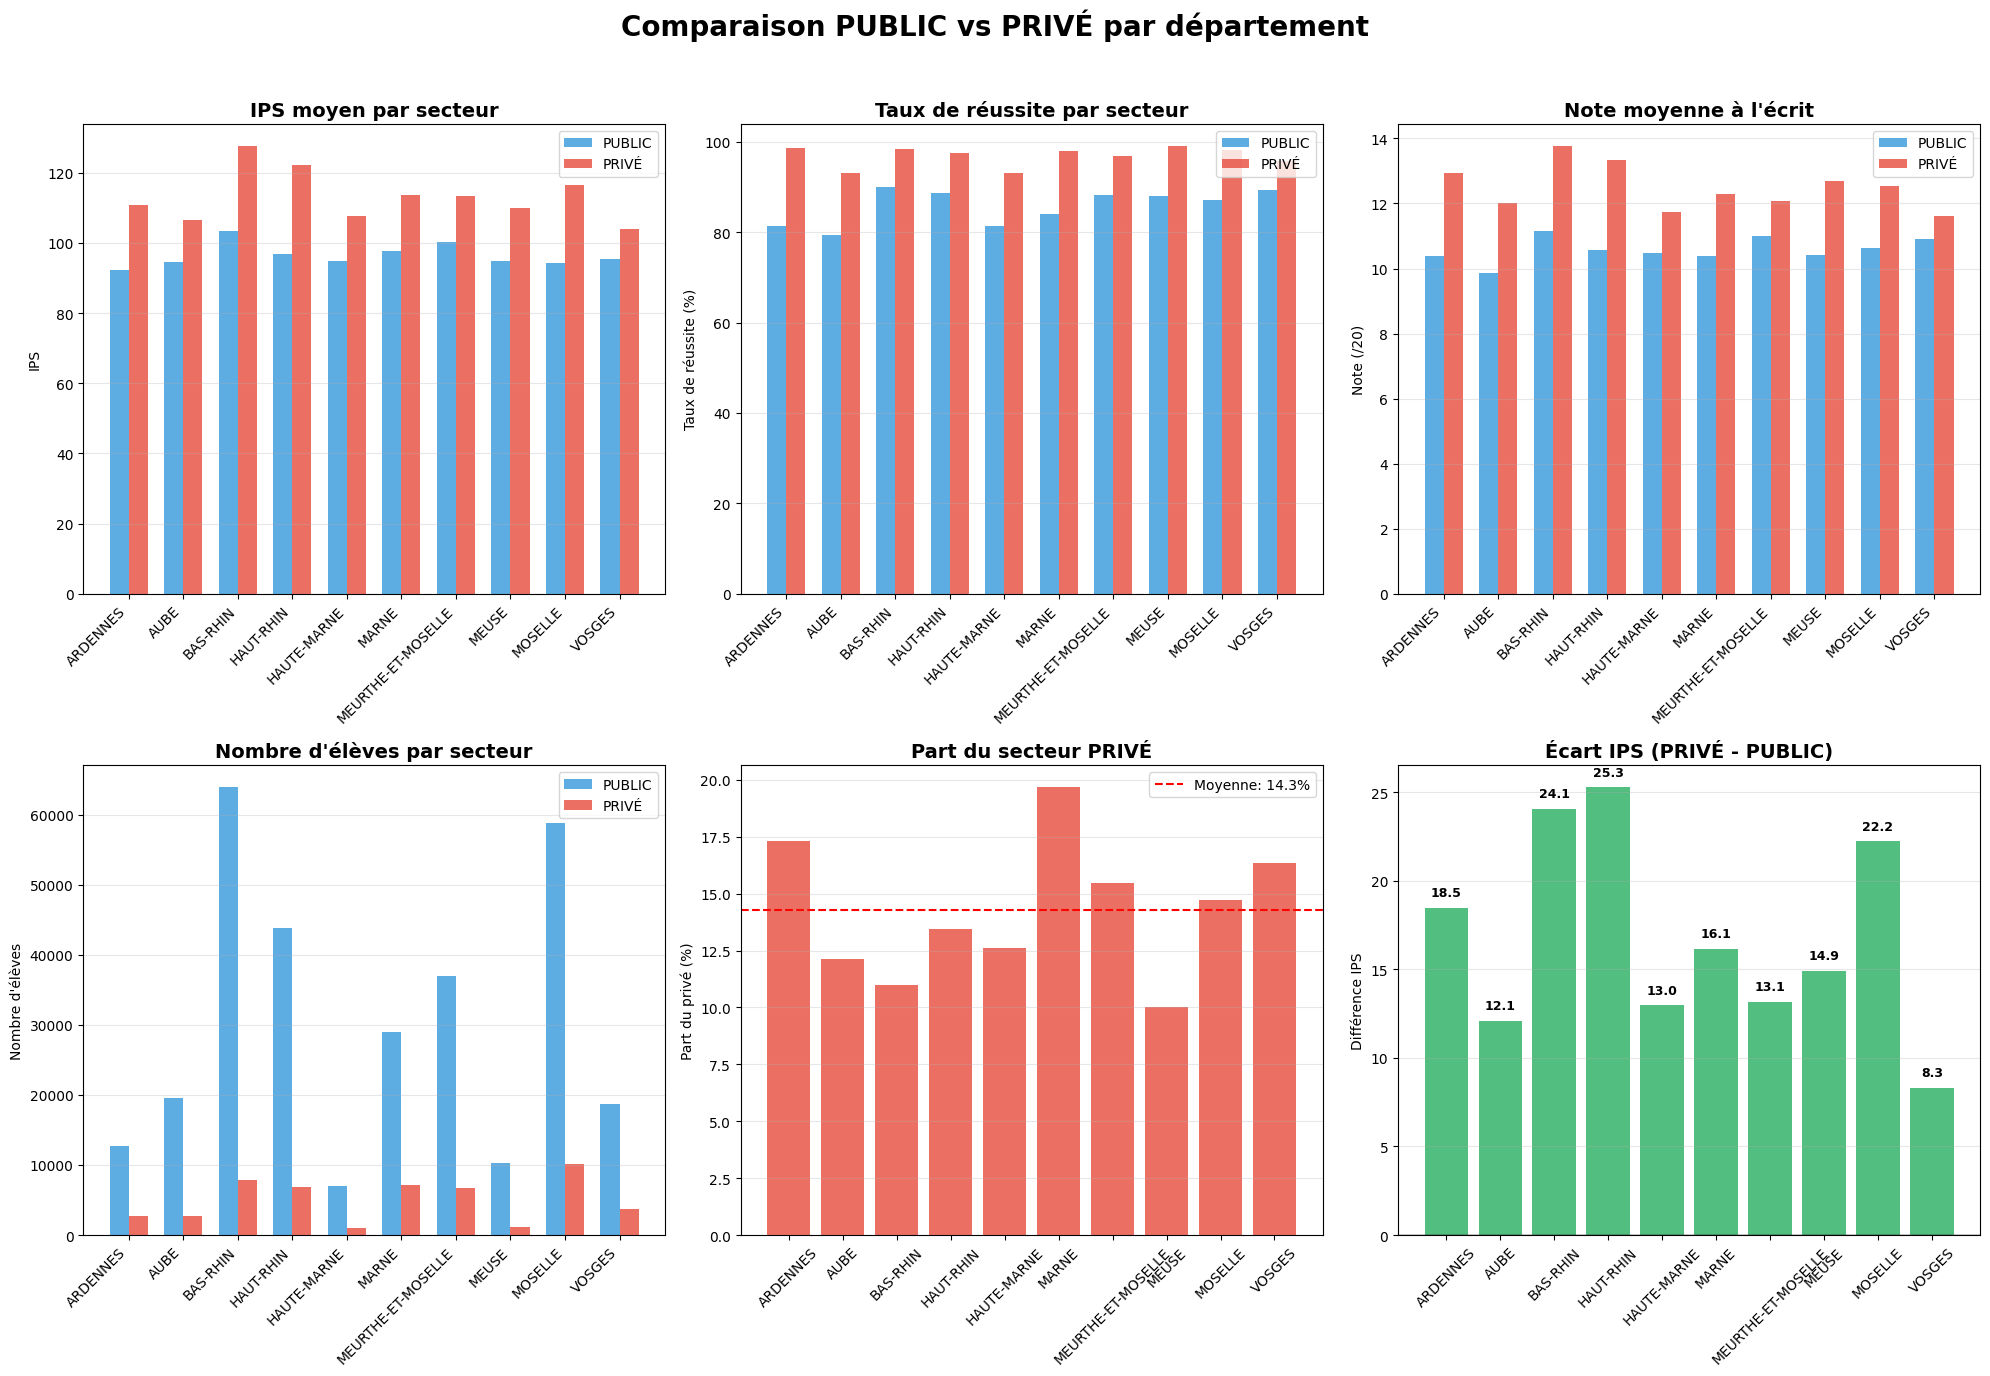

In [22]:
# Vérifier quelles colonnes existent réellement
colonnes_attendues = {
    'ips': ['ips_PRIVE', 'ips_PUBLIC'],
    'taux_reussite': ['taux_de_reussite_g_PRIVE', 'taux_de_reussite_g_PUBLIC'],
    'note_ecrit': ['note_a_lecrit_g_PRIVE', 'note_a_lecrit_g_PUBLIC'],
    'nb_eleves': ['nb_eleves_PRIVE', 'nb_eleves_PUBLIC'],
    'mentions': ['part_mention_global_g_PRIVE', 'part_mention_global_g_PUBLIC'],
    'rep': ['rep_PRIVE', 'rep_PUBLIC']
}

# Vérifier la disponibilité des colonnes
colonnes_disponibles = {}
for categorie, cols in colonnes_attendues.items():
    colonnes_disponibles[categorie] = [col for col in cols if col in df_clean.columns]
    if not colonnes_disponibles[categorie]:
        print(f"⚠️ Colonnes manquantes pour {categorie}: {cols}")

# Dashboard adaptatif
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()

departments = df_clean.index
x_pos = np.arange(len(departments))
width = 0.35

# Graphique 1 : IPS (si disponible)
ax1 = axes[0]
if len(colonnes_disponibles['ips']) == 2:
    ips_public = df_clean[colonnes_disponibles['ips'][1]]  # ips_PUBLIC
    ips_prive = df_clean[colonnes_disponibles['ips'][0]]   # ips_PRIVE

    bars1 = ax1.bar(x_pos - width/2, ips_public, width,
                    label='PUBLIC', color='#3498db', alpha=0.8)
    bars2 = ax1.bar(x_pos + width/2, ips_prive, width,
                    label='PRIVÉ', color='#e74c3c', alpha=0.8)

    ax1.set_title('IPS moyen par secteur', fontsize=14, fontweight='bold')
    ax1.set_ylabel('IPS')
    ax1.legend()
else:
    ax1.text(0.5, 0.5, 'Données IPS\nnon disponibles',
             ha='center', va='center', transform=ax1.transAxes, fontsize=12)
    ax1.set_title('IPS - Données manquantes', fontsize=14)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(departments, rotation=45, ha='right', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Graphique 2 : Taux de réussite
ax2 = axes[1]
if len(colonnes_disponibles['taux_reussite']) == 2:
    taux_public = df_clean[colonnes_disponibles['taux_reussite'][1]]
    taux_prive = df_clean[colonnes_disponibles['taux_reussite'][0]]

    bars3 = ax2.bar(x_pos - width/2, taux_public, width,
                    label='PUBLIC', color='#3498db', alpha=0.8)
    bars4 = ax2.bar(x_pos + width/2, taux_prive, width,
                    label='PRIVÉ', color='#e74c3c', alpha=0.8)

    ax2.set_title('Taux de réussite par secteur', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Taux de réussite (%)')
    ax2.legend()
else:
    ax2.text(0.5, 0.5, 'Données taux réussite\nnon disponibles',
             ha='center', va='center', transform=ax2.transAxes, fontsize=12)

ax2.set_xticks(x_pos)
ax2.set_xticklabels(departments, rotation=45, ha='right', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# Graphique 3 : Note à l'écrit
ax3 = axes[2]
if len(colonnes_disponibles['note_ecrit']) == 2:
    note_public = df_clean[colonnes_disponibles['note_ecrit'][1]]
    note_prive = df_clean[colonnes_disponibles['note_ecrit'][0]]

    bars5 = ax3.bar(x_pos - width/2, note_public, width,
                    label='PUBLIC', color='#3498db', alpha=0.8)
    bars6 = ax3.bar(x_pos + width/2, note_prive, width,
                    label='PRIVÉ', color='#e74c3c', alpha=0.8)

    ax3.set_title('Note moyenne à l\'écrit', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Note (/20)')
    ax3.legend()
else:
    ax3.text(0.5, 0.5, 'Données note écrit\nnon disponibles',
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)

ax3.set_xticks(x_pos)
ax3.set_xticklabels(departments, rotation=45, ha='right', fontsize=10)
ax3.grid(axis='y', alpha=0.3)

# Graphique 4 : Effectifs
ax4 = axes[3]
if len(colonnes_disponibles['nb_eleves']) == 2:
    eleves_public = df_clean[colonnes_disponibles['nb_eleves'][1]]
    eleves_prive = df_clean[colonnes_disponibles['nb_eleves'][0]]

    bars7 = ax4.bar(x_pos - width/2, eleves_public, width,
                    label='PUBLIC', color='#3498db', alpha=0.8)
    bars8 = ax4.bar(x_pos + width/2, eleves_prive, width,
                    label='PRIVÉ', color='#e74c3c', alpha=0.8)

    ax4.set_title('Nombre d\'élèves par secteur', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Nombre d\'élèves')
    ax4.legend()
else:
    ax4.text(0.5, 0.5, 'Données effectifs\nnon disponibles',
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)

ax4.set_xticks(x_pos)
ax4.set_xticklabels(departments, rotation=45, ha='right', fontsize=10)
ax4.grid(axis='y', alpha=0.3)

# Graphique 5 : Part du privé
ax5 = axes[4]
if len(colonnes_disponibles['nb_eleves']) == 2:
    total_eleves = eleves_public + eleves_prive
    part_prive = (eleves_prive / total_eleves) * 100

    bars9 = ax5.bar(departments, part_prive, color='#e74c3c', alpha=0.8)
    ax5.set_title('Part du secteur PRIVÉ', fontsize=14, fontweight='bold')
    ax5.set_ylabel('Part du privé (%)')

    # Moyenne nationale
    moyenne_prive = part_prive.mean()
    ax5.axhline(y=moyenne_prive, color='red', linestyle='--',
               label=f'Moyenne: {moyenne_prive:.1f}%')
    ax5.legend()
else:
    ax5.text(0.5, 0.5, 'Impossible de calculer\nla part du privé',
             ha='center', va='center', transform=ax5.transAxes, fontsize=12)

ax5.tick_params(axis='x', rotation=45, labelsize=10)
ax5.grid(axis='y', alpha=0.3)

# Graphique 6 : Écart PRIVÉ - PUBLIC (adaptable selon les données disponibles)
ax6 = axes[5]
if len(colonnes_disponibles['ips']) == 2:
    ecart_principal = ips_prive - ips_public
    titre_ecart = 'Écart IPS (PRIVÉ - PUBLIC)'
    ylabel_ecart = 'Différence IPS'
elif len(colonnes_disponibles['taux_reussite']) == 2:
    ecart_principal = taux_prive - taux_public
    titre_ecart = 'Écart Taux réussite (PRIVÉ - PUBLIC)'
    ylabel_ecart = 'Différence taux (%)'
else:
    ecart_principal = None

if ecart_principal is not None:
    colors = ['#27ae60' if x > 0 else '#e74c3c' for x in ecart_principal]
    bars10 = ax6.bar(departments, ecart_principal, color=colors, alpha=0.8)
    ax6.set_title(titre_ecart, fontsize=14, fontweight='bold')
    ax6.set_ylabel(ylabel_ecart)
    ax6.axhline(y=0, color='black', linestyle='-', linewidth=1)

    # Ajouter les valeurs
    for bar, val in zip(bars10, ecart_principal):
        ax6.text(bar.get_x() + bar.get_width()/2., val + (0.5 if val > 0 else -0.5),
                 f'{val:.1f}', ha='center', va='bottom' if val > 0 else 'top',
                 fontweight='bold', fontsize=9)
else:
    ax6.text(0.5, 0.5, 'Impossible de calculer\nl\'écart',
             ha='center', va='center', transform=ax6.transAxes, fontsize=12)

ax6.tick_params(axis='x', rotation=45, labelsize=10)
ax6.grid(axis='y', alpha=0.3)

plt.suptitle('Comparaison PUBLIC vs PRIVÉ par département',
             fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Heatmap - Analyse des écarts PUBLIC vs PRIVÉ

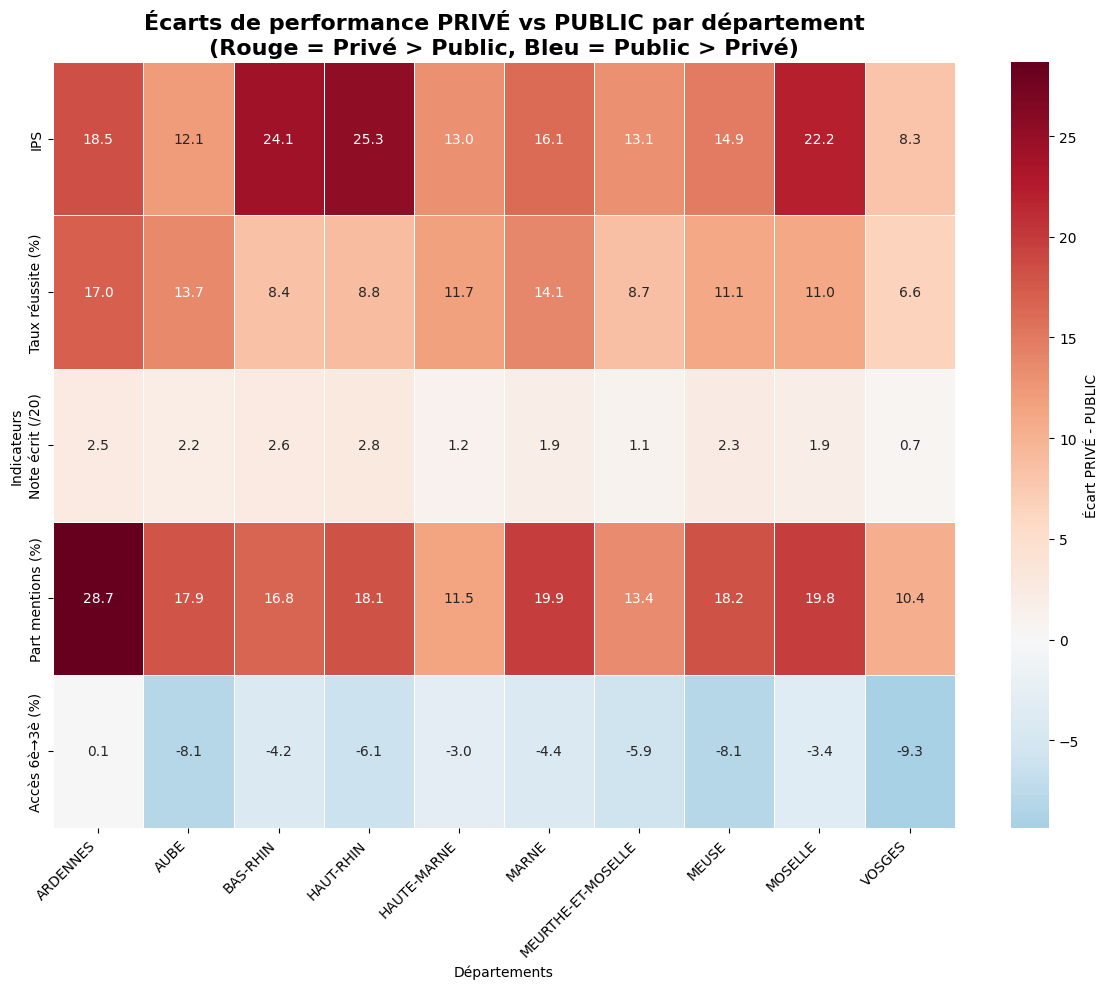

📊 ANALYSE DES ÉCARTS PRIVÉ - PUBLIC

IPS:
  Écart moyen: +16.75
  Départements où PRIVÉ > PUBLIC: 10/10
  Départements où PUBLIC > PRIVÉ: 0/10
  Plus grand écart pro-PRIVÉ: HAUT-RHIN (+25.3)
  Plus grand écart pro-PUBLIC: VOSGES (+8.3)

Taux réussite (%):
  Écart moyen: +11.12
  Départements où PRIVÉ > PUBLIC: 10/10
  Départements où PUBLIC > PRIVÉ: 0/10
  Plus grand écart pro-PRIVÉ: ARDENNES (+17.0)
  Plus grand écart pro-PUBLIC: VOSGES (+6.6)

Note écrit (/20):
  Écart moyen: +1.91
  Départements où PRIVÉ > PUBLIC: 10/10
  Départements où PUBLIC > PRIVÉ: 0/10
  Plus grand écart pro-PRIVÉ: HAUT-RHIN (+2.8)
  Plus grand écart pro-PUBLIC: VOSGES (+0.7)

Part mentions (%):
  Écart moyen: +17.46
  Départements où PRIVÉ > PUBLIC: 10/10
  Départements où PUBLIC > PRIVÉ: 0/10
  Plus grand écart pro-PRIVÉ: ARDENNES (+28.7)
  Plus grand écart pro-PUBLIC: VOSGES (+10.4)

Accès 6è→3è (%):
  Écart moyen: -5.23
  Départements où PRIVÉ > PUBLIC: 1/10
  Départements où PUBLIC > PRIVÉ: 9/10
  Plus gr

In [23]:
# Calculer les écarts pour tous les indicateurs
indicateurs_comparaison = [
    ('ips', 'IPS'),
    ('taux_de_reussite_g', 'Taux réussite (%)'),
    ('note_a_lecrit_g', 'Note écrit (/20)'),
    ('part_mention_global_g', 'Part mentions (%)'),
    ('taux_dacces_6eme_3eme', 'Accès 6è→3è (%)')
]

ecarts_data = {}
for indic, nom in indicateurs_comparaison:
    if f'{indic}_PRIVE' in df_clean.columns and f'{indic}_PUBLIC' in df_clean.columns:
        ecarts_data[nom] = df_clean[f'{indic}_PRIVE'] - df_clean[f'{indic}_PUBLIC']

df_ecarts = pd.DataFrame(ecarts_data, index=df_clean.index)

# Heatmap des écarts
plt.figure(figsize=(12, 10))
sns.heatmap(df_ecarts.T,
            center=0,
            cmap='RdBu_r',
            annot=True,
            fmt='.1f',
            cbar_kws={'label': 'Écart PRIVÉ - PUBLIC'},
            linewidths=0.5)

plt.title('Écarts de performance PRIVÉ vs PUBLIC par département\n(Rouge = Privé > Public, Bleu = Public > Privé)',
          fontsize=16, fontweight='bold')
plt.xlabel('Départements')
plt.ylabel('Indicateurs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Statistiques des écarts
print("📊 ANALYSE DES ÉCARTS PRIVÉ - PUBLIC")
print("="*45)
for indic, ecarts in df_ecarts.items():
    moyenne_ecart = ecarts.mean()
    ecart_positif = (ecarts > 0).sum()
    ecart_negatif = (ecarts < 0).sum()

    print(f"\n{indic}:")
    print(f"  Écart moyen: {moyenne_ecart:+.2f}")
    print(f"  Départements où PRIVÉ > PUBLIC: {ecart_positif}/{len(ecarts)}")
    print(f"  Départements où PUBLIC > PRIVÉ: {ecart_negatif}/{len(ecarts)}")

    # Écarts les plus marqués
    max_ecart = ecarts.max()
    min_ecart = ecarts.min()
    dept_max = ecarts.idxmax()
    dept_min = ecarts.idxmin()

    print(f"  Plus grand écart pro-PRIVÉ: {dept_max} ({max_ecart:+.1f})")
    print(f"  Plus grand écart pro-PUBLIC: {dept_min} ({min_ecart:+.1f})")

### Focus sur les établissements REP

/tmp/ipython-input-24-1735201274.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

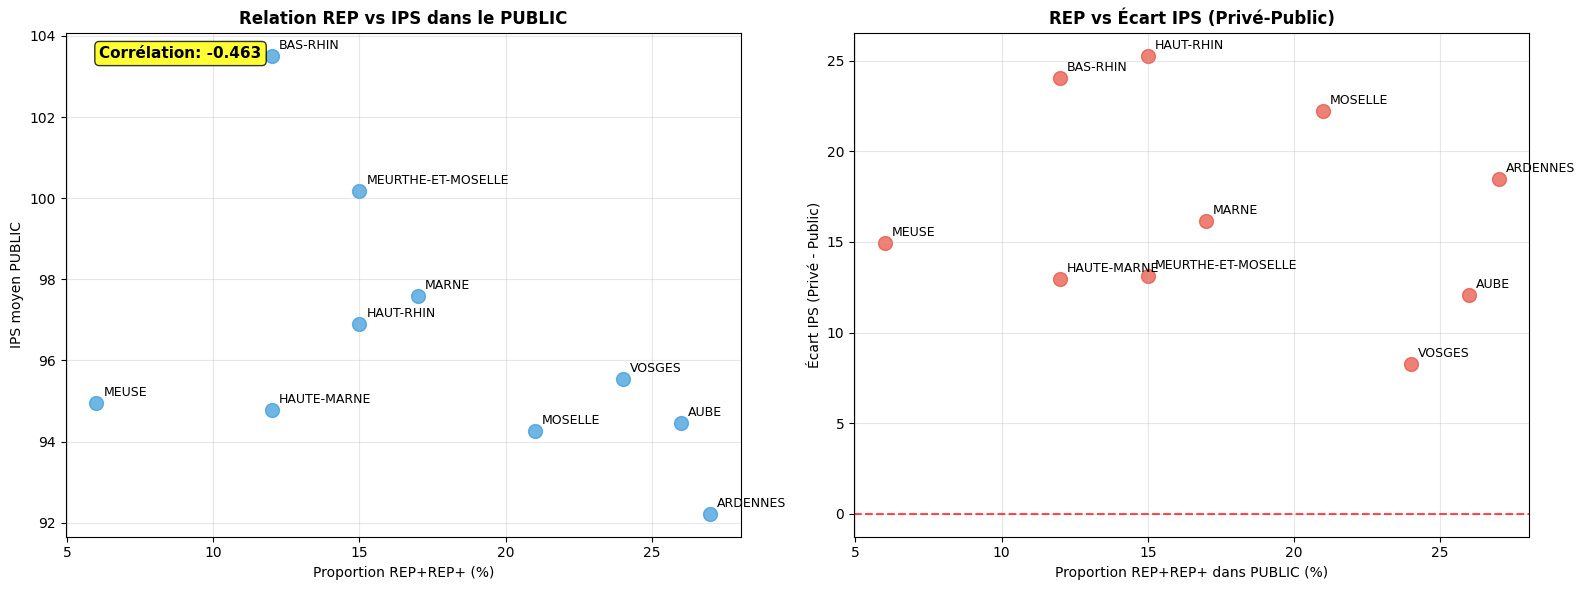

In [24]:
# Analyser la répartition REP (normalement que dans le public)
plt.figure(figsize=(14, 8))

# REP + REP+ dans le public
rep_data = df_clean[['rep_PUBLIC', 'rep_plus_PUBLIC']].fillna(0)
rep_data['Total_REP'] = rep_data['rep_PUBLIC'] + rep_data['rep_plus_PUBLIC']

# Stacked bar chart
ax = rep_data[['rep_PUBLIC', 'rep_plus_PUBLIC']].plot(kind='bar', stacked=True,
                                                     color=['#f39c12', '#e74c3c'],
                                                     alpha=0.8, figsize=(14, 8))

ax.set_title('Proportion d\'établissements REP et REP+ dans le PUBLIC',
             fontsize=16, fontweight='bold')
ax.set_ylabel('Proportion (%)')
ax.set_xlabel('Départements')
ax.legend(['REP', 'REP+'], loc='upper right')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

# Ajouter les totaux
for i, (dept, total) in enumerate(rep_data['Total_REP'].items()):
    if total > 0:
        ax.text(i, total * 100 + 1, f'{total*100:.1f}%',
               ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Corrélation REP vs IPS public
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# REP vs IPS PUBLIC
ax1.scatter(rep_data['Total_REP'] * 100, df_clean['ips_PUBLIC'],
           s=100, alpha=0.7, color='#3498db')

for dept, row in df_clean.iterrows():
    rep_total = rep_data.loc[dept, 'Total_REP'] * 100
    ips_pub = row['ips_PUBLIC']
    ax1.annotate(dept, (rep_total, ips_pub),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax1.set_title('Relation REP vs IPS dans le PUBLIC', fontweight='bold')
ax1.set_xlabel('Proportion REP+REP+ (%)')
ax1.set_ylabel('IPS moyen PUBLIC')
ax1.grid(True, alpha=0.3)

# Corrélation
corr_rep_ips = (rep_data['Total_REP'] * 100).corr(df_clean['ips_PUBLIC'])
ax1.text(0.05, 0.95, f'Corrélation: {corr_rep_ips:.3f}',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
         fontsize=11, fontweight='bold')

# REP vs Écart IPS (Privé-Public)
ax2.scatter(rep_data['Total_REP'] * 100, df_ecarts['IPS'],
           s=100, alpha=0.7, color='#e74c3c')

for dept in df_clean.index:
    rep_total = rep_data.loc[dept, 'Total_REP'] * 100
    ecart_ips = df_ecarts.loc[dept, 'IPS']
    ax2.annotate(dept, (rep_total, ecart_ips),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax2.set_title('REP vs Écart IPS (Privé-Public)', fontweight='bold')
ax2.set_xlabel('Proportion REP+REP+ dans PUBLIC (%)')
ax2.set_ylabel('Écart IPS (Privé - Public)')
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Synthèse département

In [25]:
df_clean.head(5)

,ips_PRIVE,ips_PUBLIC,nb_candidats_g_PRIVE,nb_candidats_g_PUBLIC,nb_eleves_PRIVE,nb_eleves_PUBLIC,note_a_lecrit_g_PRIVE,note_a_lecrit_g_PUBLIC,part_mention_global_g_PRIVE,part_mention_global_g_PUBLIC,part_presents_3eme_ordinaire_total_PRIVE,part_presents_3eme_ordinaire_total_PUBLIC,rep_PRIVE,rep_PUBLIC,rep_plus_PRIVE,rep_plus_PUBLIC,taux_dacces_6eme_3eme_PRIVE,taux_dacces_6eme_3eme_PUBLIC,taux_de_reussite_g_PRIVE,taux_de_reussite_g_PUBLIC
departement,,,,,,,,,,,,,,,,,,,,
ARDENNES,110.68,92.22,604,2728,2651,12679,12.93,10.39,92.40,63.74,98.00,96.50,0.0,0.22,0.0,0.05,91.17,91.05,98.50,81.45
AUBE,106.55,94.46,622,4482,2698,19542,12.02,9.86,79.00,61.11,98.38,96.68,0.0,0.13,0.0,0.13,83.25,91.32,93.00,79.26
BAS-RHIN,127.57,103.51,1973,14183,7874,63867,13.76,11.16,92.67,75.90,98.54,96.51,0.0,0.08,0.0,0.04,88.08,92.33,98.46,90.03
HAUT-RHIN,122.16,96.89,1589,9181,6805,43759,13.35,10.57,90.25,72.12,97.45,97.00,0.0,0.02,0.0,0.13,86.18,92.24,97.55,88.71
HAUTE-MARNE,107.73,94.77,211,1517,1015,7036,11.73,10.48,77.74,66.26,97.33,97.71,0.0,0.12,0.0,0.00,90.33,93.29,93.00,81.33
